# ÖRNEK KODLAR

Ayrık-zamanlı Fourier dönüşümü (DTFT)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib notebook
from scipy.fftpack import fft , ifft

<IPython.core.display.Javascript object>


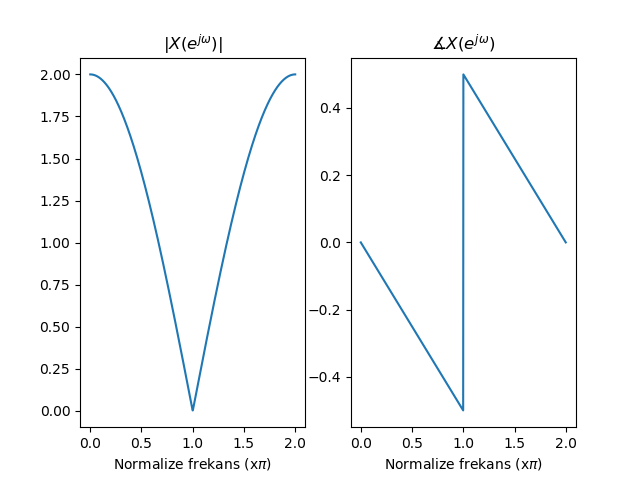

Text(0.5, 0, 'Normalize frekans (x$\\pi$)')

In [126]:

w_cont=np.linspace(0,2*np.pi,1000)
X_abs=np.abs(2*np.cos(w/2))
# yukarıda exp li kısmı yassanda yazmasanda olur.
X_phase=np.array([-w/2 if w<np.pi else -w/2+np.pi for w in w_cont])
plt.subplot(121)
plt.plot(w/np.pi,X_abs)
plt.title('$|X(e^{j\omega})|$')
plt.xlabel('Normalize frekans (x$\pi$)')
plt.subplot(122)
plt.plot(w/np.pi,X_phase/np.pi)
plt.title('$ \measuredangle X(e^{j\omega})$')
plt.xlabel('Normalize frekans (x$\pi$)')

Ayrık Fourier dönüşümü (DFT)

In [115]:
def dirac (n):
    if n==0:
        return 1
    else:
        return 0 

<IPython.core.display.Javascript object>


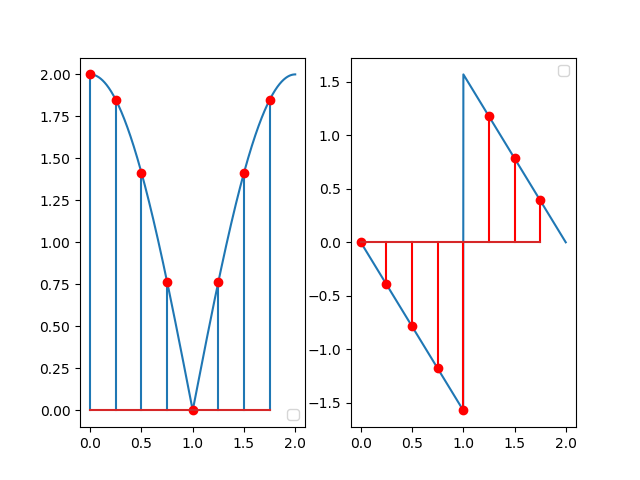

C:\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
No handles with labels found to put in legend.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
No handles with labels found to put in legend.


In [128]:
N=8
X_k=np.zeros([N],dtype=complex)
for k in range (N):
    for n in range (N):
        X_k[k]=X_k[k]+(dirac(n)+dirac(n-1))*np.exp(-1j*(2*np.pi/N)*k*n)
X_k_abs=np.abs(X_k)
X_k_phase=np.angle(X_k)

plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs)
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,X_k_abs,markerfmt='ro')
plt.legend()
plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase)
plt.stem(w_discrete/np.pi,X_k_phase,'r-',markerfmt='ro')
plt.legend()

Hızlı Fourier Dönüşümü (FFT)

<IPython.core.display.Javascript object>


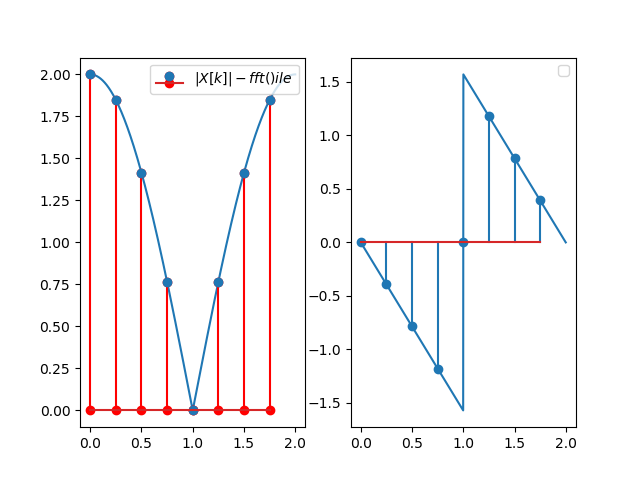

C:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
No handles with labels found to put in legend.


In [82]:
x=np.array([1,1])
fft_X=fft(x,8)
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)
##grafik çizimi
plt.figure()
plt.subplot(121)
plt.plot(w_cont/np.pi,X_abs)
w_discrete=np.arange(0,N)*(2*np.pi/N)
plt.stem(w_discrete/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.legend(loc='upper right')
plt.subplot(122)
plt.plot(w_cont/np.pi,X_phase)
plt.stem(w_discrete/np.pi,phase_fft_X)
plt.legend(loc='upper right')

Frekansta örnekleme →Zamanda periyodiklik ilişkisi

<IPython.core.display.Javascript object>


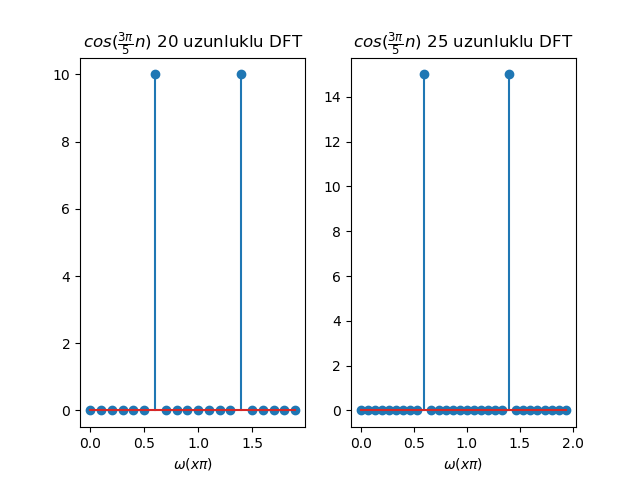

C:\anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
C:\anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, '$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

In [130]:
#20 uzunluklu versiyonu
n1=np.arange(0,20)
X1=np.cos(3*np.pi/5*n1)
X1_abs=np.abs(fft(X1))
w_disc_1=n1*2*np.pi/len(n1)

plt.figure()
plt.subplot(121)
plt.stem(w_disc_1/np.pi,X1_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 20 uzunluklu DFT')


#25 uzunluklu versiyon
n2=np.arange(0,30)
x2=np.cos(3*np.pi/5*n2)
X2_abs=np.abs(fft(x2))
w_disc_2=n2*2*np.pi/len(n2) #0-2pi arası 2pi/25 adımlı vektör (2pi
#noktası dahil değil)
plt.subplot(122)
plt.stem(w_disc_2/np.pi,X2_abs)
plt.xlabel('$\omega (x\pi)$')
plt.title('$cos(\\frac{3\\pi}{5}n)$ 25 uzunluklu DFT')

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft , ifft
x=np.array([0,2,0,-2])
N=len(x)
n=np.arange(0,4)
w_disc=n*2*np.pi/N # 0-2pi arasında(2pi noktası dahil değil) 2pi/4

X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)
plt.subplot(121)
plt.stem(w_disc/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)
plt.stem(w_disc/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')


C:\anaconda\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
C:\anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
C:\anaconda\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instan

Text(0.5, 23.52222222222222, '$\\omega (\\times \\pi)$')

BASAMAK, DÜRTÜ İŞARETLERİNİN KOLAYCA
OLUŞTURULMASI

In [94]:
n=np.arange(-20,21)
#yol1
u_n=np.array([0 if i<0 else 1 for i in n ])
print(u_n)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [96]:
# 2. yol 
u_n =[]
for i in n :
    if i<0:
        u_n.append(0)
    else:
        u_n.append(1)
#yol-4
u_n=np.ones(len(n))
u_n[n<0]=0

𝑢[𝑛 − 3]:

<IPython.core.display.Javascript object>


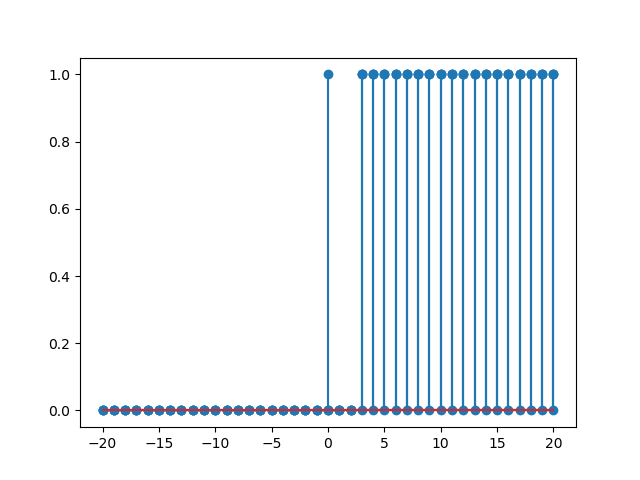

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
n=np.arange(-20,21)
u_n_3=np.array([0 if i<3 else 1 for i in n])
plt.stem(n,u_n_3)
plt.show()

𝛿 [𝑛]:

<IPython.core.display.Javascript object>


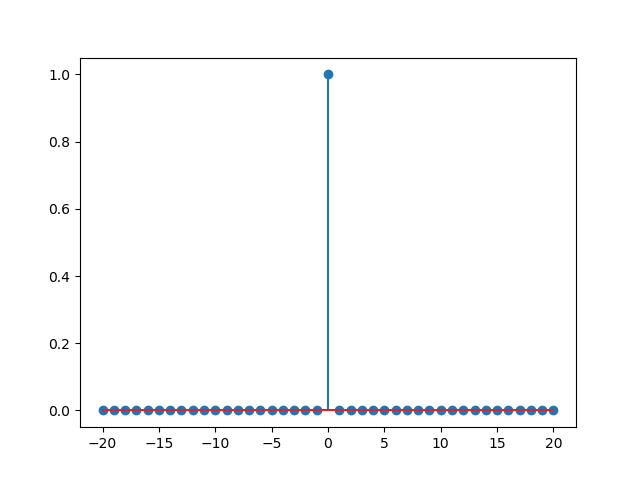

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


In [105]:
n= np.arange(-20,21)
dirac_n = np.array([0 if i!=0 else 1 for i in n])

plt.stem(n,dirac_n)
plt.show()

# ODEV-3

# PROBLEM-1

# A)

dirac fonksiyonun fourier dönüşümü 1 dir.dirac[n-1] fonksiyonun ise fourier dönüşümü gene 1 getirir fakat zamanda 1 birim sağa ötelenmeden dolayı e^(-j*w) gibi bir kat sayı ile çarpılır


No handles with labels found to put in legend.
No handles with labels found to put in legend.


2.4492935982947064e-16


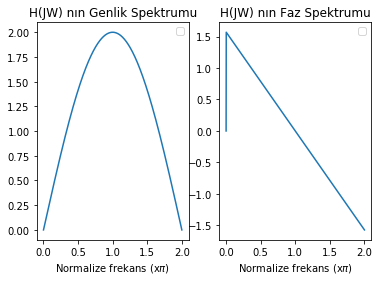

In [5]:
w_cont=np.linspace(0,2*np.pi,1000)

x=np.zeros(len(w_cont))
x=1-np.exp(-1j*w_cont)


x_phase=np.abs(x)
x_angle=np.angle(x)
##grafik çizimi
plt.figure()
plt.subplot(121)
w_discrete=np.arange(0,1000)*(2*np.pi/1000)
plt.plot(w_cont/np.pi,x_phase)
plt.xlabel('Normalize frekans (x$\pi$)')
plt.title("H(JW) nın Genlik Spektrumu")
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(w_cont/np.pi,x_angle)
plt.title("H(JW) nın Faz Spektrumu")
plt.xlabel('Normalize frekans (x$\pi$)')
plt.legend(loc='upper right')
print(x_phase[999])

# C) 

No handles with labels found to put in legend.


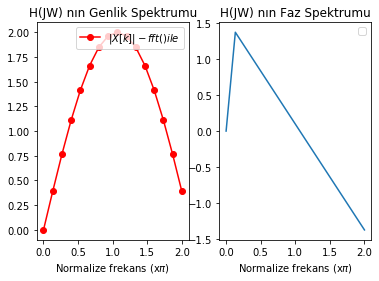

In [7]:
w_cont=np.linspace(0,2*np.pi,16)

x=np.zeros(len(w_cont))
x[0]=1
x[1]=-1
fft_X=fft(x,16)
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)
##grafik çizimi
plt.figure()
plt.subplot(121)
w_discrete=np.arange(0,16)*(2*np.pi/16)
plt.plot(w_cont/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.xlabel('Normalize frekans (x$\pi$)')
plt.title("H(JW) nın Genlik Spektrumu")
plt.legend(loc='upper right')


plt.subplot(1,2,2)
plt.plot(w_cont/np.pi,phase_fft_X)
plt.title("H(JW) nın Faz Spektrumu")
plt.xlabel('Normalize frekans (x$\pi$)')
plt.legend(loc='upper right')
print()

# PROBLEM-2

[ 0.          1.57079633 -0.         -1.57079633  0.          1.57079633
  0.         -1.57079633]
[0.00000000e+00 2.76191153e-07 0.00000000e+00 4.99999724e-01
 0.00000000e+00 4.99999724e-01 0.00000000e+00 2.76191153e-07]


C:\anaconda\lib\site-packages\ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
C:\anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, '$\\frac{1}{N}\\measuredangle X(e^{j\\omega})(\\times\\pi)=\\measuredangle a_k(\\times \\pi)$')

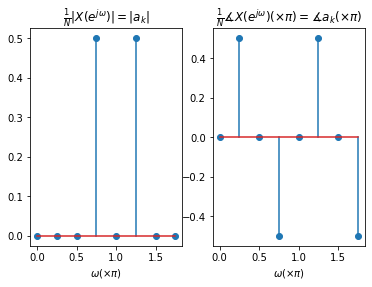

In [34]:
x=np.array([0,0.707106,-1,0.707106,0,-0.707106,1,-0.707106])
N=len(x)
n=np.arange(0,8)
w_discrete=n*2*np.pi/N

X_abs=np.abs(fft(x)/N)
X_phase=np.angle(fft(x)/N)

print(X_phase)
print(X_abs)

plt.subplot(121)
plt.stem(w_discrete/np.pi,X_abs)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}|X(e^{j\omega})|=|a_{k}|$')
plt.subplot(122)
plt.stem(w_discrete/np.pi,X_phase/np.pi)
plt.xlabel('$\omega (\\times \pi)$')
plt.title('$\\frac{1}{N}\measuredangle X(e^{j\omega})(\\times\pi)=\measuredangle a_k(\\times \pi)$')

# PROBLEM-3

No handles with labels found to put in legend.


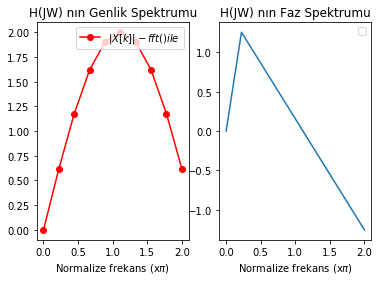

In [35]:
w_cont=np.linspace(0,2*np.pi,10)

x=np.zeros(len(w_cont))
x[0]=1
x[1]=-1
fft_X=fft(x,10)
abs_fft_X=np.abs(fft_X)
phase_fft_X=np.angle(fft_X)
##grafik çizimi
plt.figure()
plt.subplot(121)
w_discrete=np.arange(0,10)*(2*np.pi/10)
plt.plot(w_cont/np.pi,abs_fft_X,'ro-',label='$|X[k]|-fft() ile$')
plt.xlabel('Normalize frekans (x$\pi$)')
plt.title("H(JW) nın Genlik Spektrumu")
plt.legend(loc='upper right')


plt.subplot(1,2,2)
plt.plot(w_cont/np.pi,phase_fft_X)
plt.title("H(JW) nın Faz Spektrumu")
plt.xlabel('Normalize frekans (x$\pi$)')
plt.legend(loc='upper right')